# Blackjack

In [1]:
%run Blackjack.py
import matplotlib.pyplot as plt
%matplotlib inline

## Monte Carlo Prediction

In [2]:
# Number of states.
S = 10 * 10 * 2
# Number of actions.
A = 2

# Basic policy.
pi = np.zeros(S, dtype=np.int32)
for s in range(S):
    hand, dealer, ace = np.asarray(np.unravel_index(s, (10, 10, 2), order='F')) + [12, 1, 1]
    if hand < 17:
        # Hit.
        pi[s] = 0
    else:
        # Stick.
        pi[s] = 1

# Discount factor.
gamma = 1.0
# Exploration degree.
epsilon = 0.0
# Number of episodes.
episodes = 10000
# Inizialization.
N = np.zeros(S, dtype=np.int32)
V = np.zeros(S, dtype=np.float64)

# Loop on episodes.
for e in range(episodes):
    # Exploring start.
    init_s = np.random.randint(S)
    # Run a game.
    bj = Blackjack(init_s, pi, epsilon)
    bj.play()
    states = bj.get_states()
    rewards = bj.get_rewards()
    G = 0.0
    for t, s_t in reversed(list(enumerate(states))):
        G = rewards[t] + (gamma * G)
        N[s_t] += 1
        V[s_t] += (1.0 / N[s_t]) * (G - V[s_t])

## Monte Carlo Control

In [16]:
# Number of states.
S = 10 * 10 * 2
# Number of actions.
A = 2
# Init a randomic policy.
pi = np.random.randint(2, size=S)
# Discount factor.
gamma = 1.0
# Exploration degree.
epsilon = 0.1
# Number of episodes.
episodes = 1000000
# Inizialization.
N = np.zeros((S, A), dtype=np.int32)
Q = np.zeros((S, A), dtype=np.float64)

# Loop on episodes.
for e in range(episodes):
    # Exploring start.
    init_s = np.random.randint(S)
    # Run a game.
    bj = Blackjack(init_s, pi, epsilon)
    bj.play()
    states = bj.get_states()
    actions = bj.get_actions()
    rewards = bj.get_rewards()
    G = 0.0
    for t, s_t in reversed(list(enumerate(states))):
        G = rewards[t] + gamma * G
        N[s_t, actions[t]] += 1
        Q[s_t, actions[t]] += (1.0 / N[s_t, actions[t]]) * (G - Q[s_t, actions[t]])
        pi[s_t] = np.argmax(Q[s_t, :])

Text(0, 0.5, 'Number of cars to move')

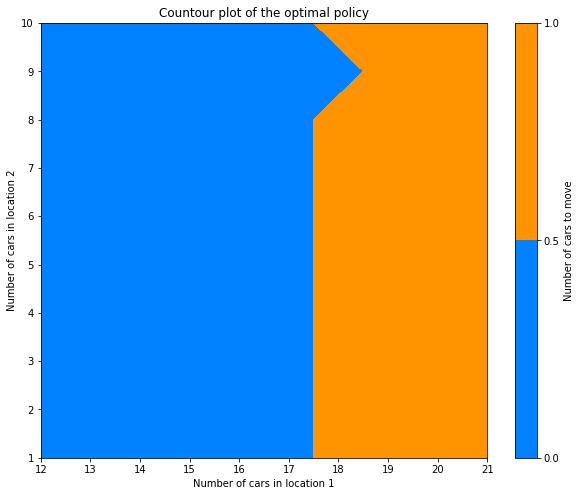

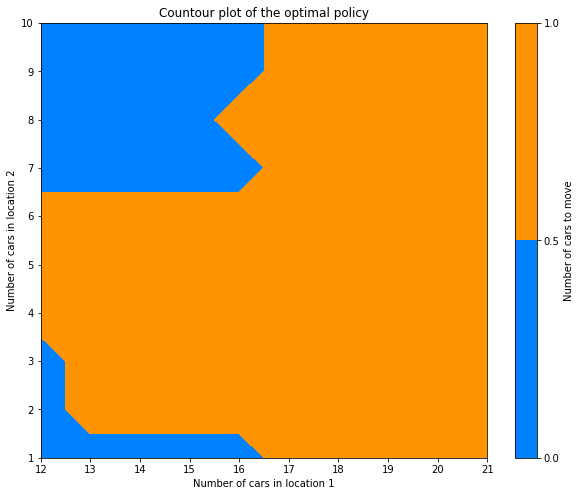

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
x, y = np.meshgrid(np.arange(12, 22, 1), np.arange(1, 11, 1))
z = pi[0:100].reshape(10, 10)
cs = ax.contourf(x, y, z,  1, cmap=plt.cm.jet)
ax.set_title('Countour plot of the optimal policy')
ax.set_xlabel('Number of cars in location 1')
ax.set_ylabel('Number of cars in location 2')

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Number of cars to move')

fig, ax = plt.subplots(figsize=(10, 8))
x, y = np.meshgrid(np.arange(12, 22, 1), np.arange(1, 11, 1))
z = pi[100:200].reshape(10, 10)
cs = ax.contourf(x, y, z, 1, cmap=plt.cm.jet)
ax.set_title('Countour plot of the optimal policy')
ax.set_xlabel('Number of cars in location 1')
ax.set_ylabel('Number of cars in location 2')

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Number of cars to move')